In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-04-12 22:48:50.289801: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 22:48:50.325246: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 22:48:50.417660: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 22:48:54.314400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Define path to the saved model and the directory containing validation data
model_path = "/home/arush/GW_Test_1/Model_Training/complex_spectrogram_model.h5"
validation_dir = "Data_v2/validation"
img_height, img_width = 320, 480  # Image dimensions
batch_size = 8  # Batch size used for prediction

# Load the saved model
model = load_model(model_path)

# Prepare the validation data generator
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,  # Important for matching predictions with their true labels
)

# Predict the data from the validation set
validation_generator.reset()  # Reset the generator to be sure of no shuffling
predictions = model.predict(
    validation_generator, steps=validation_generator.samples // batch_size + 1
)
predicted_classes = np.argmax(predictions, axis=1)

# Retrieve true labels
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # Names of the classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=range(len(class_labels)))

Found 800 images belonging to 4 classes.


/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 58s 568ms/step


/home/arush/anaconda3/envs/python39_1/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-12 22:49:59.420270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


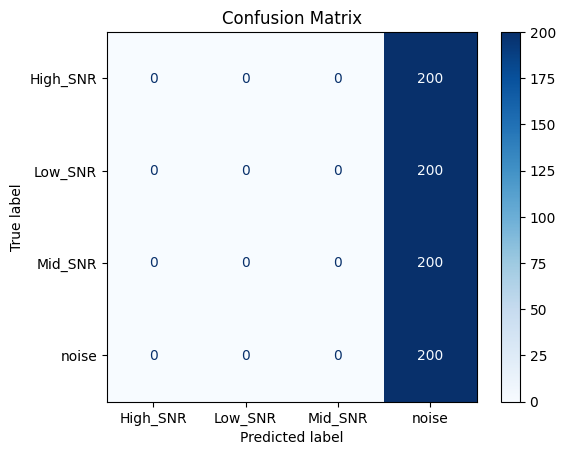

In [3]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()